<a href="https://colab.research.google.com/github/AsmaBenHmidene/food-sales-predictions/blob/main/Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I.Load data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
filename = '/content/drive/MyDrive/Coding Dojo/Week2/sales_predictions_2023 (1).csv'
df1 = pd.read_csv(filename)
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#II.cleaning data:

In [ ]:
df1.shape

(8523, 12)

Data type:

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Duplicates:

In [ ]:
df1.duplicated().sum()

0

Irrelevent data:

In [ ]:
df1.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df= df1.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier','Item_Visibility'])
df.head()

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,Fruits and Vegetables,182.0950,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


Missing value:

In [ ]:
df.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Type                  0
Item_MRP                   0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

In [ ]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [ ]:
df['Outlet_Size'].value_counts(normalize = True).mul(100).round(2)

Medium    61.05
Small     28.02
High      10.94
Name: Outlet_Size, dtype: float64

In [ ]:
df['Item_Weight'].fillna(value =df['Item_Weight'].mean(),inplace=True )

Inconsistent categories of data

In [ ]:
df['Item_Fat_Content'].value_counts(normalize = True).mul(100).round(2)

Low Fat    59.71
Regular    33.90
LF          3.71
reg         1.37
low fat     1.31
Name: Item_Fat_Content, dtype: float64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat').replace('low fat','Low Fat').replace('reg','Regular')
df['Item_Fat_Content'].value_counts(normalize = True).mul(100).round(2)

Low Fat    64.73
Regular    35.27
Name: Item_Fat_Content, dtype: float64

#III.Data Visualization

#Objective: Help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

1. Analyse Item Outlet Sales:

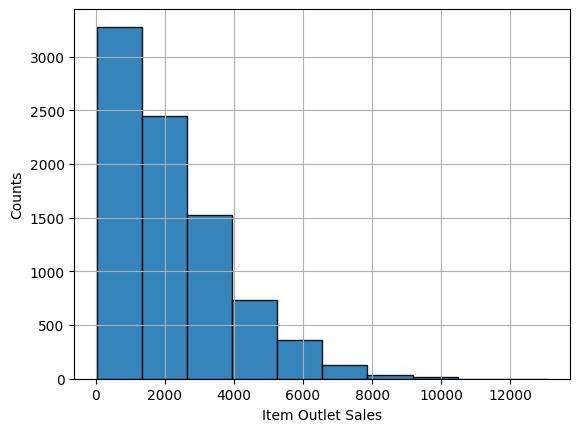

In [ ]:
df['Item_Outlet_Sales'].hist(alpha=.9, edgecolor='black');
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Counts');

Item Outlet Sales represent a right skewed histogram; the average of sales is 3500 (mean value) and the most frequently occurred sales (mode) are between 0 and 1500. the value in the middle of a the data set (median ) is equal to 2000.

2.Analyse the relation between Item Outlet Sales and Item Type/Item Fat Content:

Graph 2.A

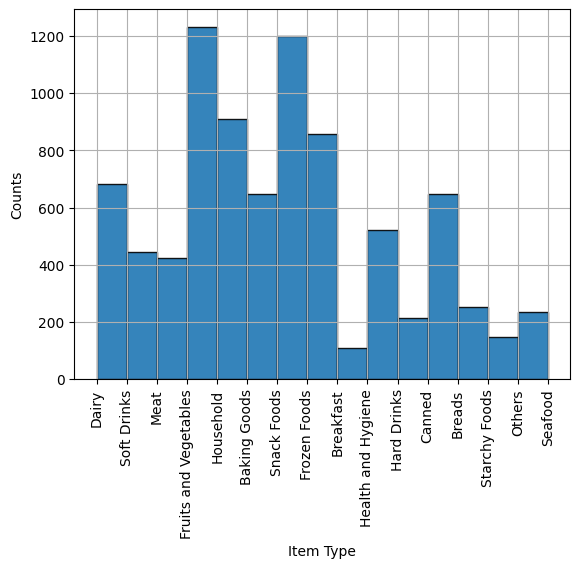

In [ ]:
df['Item_Type'].hist(alpha=.9, edgecolor='black',bins = 15);
plt.xticks(rotation = 90)
plt.xlabel('Item Type')
plt.ylabel('Counts');

The outlets offer to sell as a main products Fruits and vegetables.

Graph 2.B

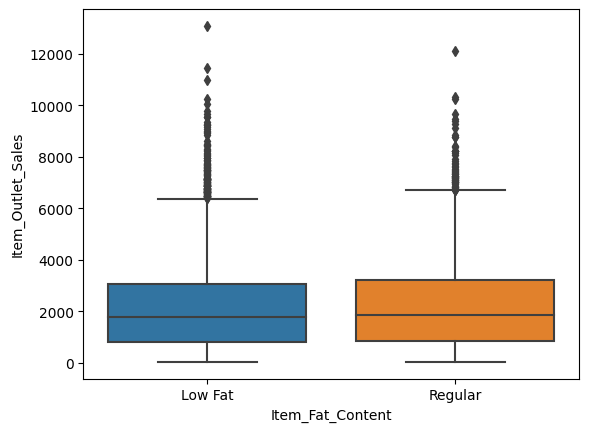

In [ ]:
sns.boxplot(data=df, x='Item_Fat_Content', y="Item_Outlet_Sales");

Low fat items sales are almost equal to regular items sales.However, regular items sales has a wider spread than Low fat items sales. Also, both items types are positively skewed, more concentrated at the lower end. which means that the lower sales are more concentrated within a narrower range of values than the higher sales.

Graph 2.C

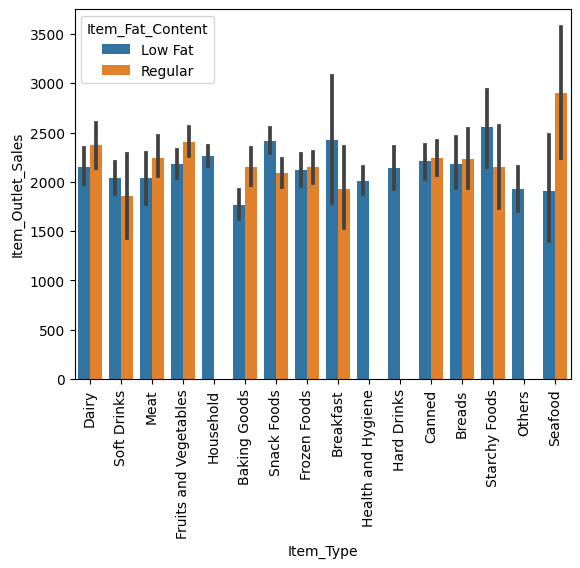

In [ ]:
sns.barplot(data=df, x='Item_Type', y="Item_Outlet_Sales", hue='Item_Fat_Content');
plt.xticks(rotation = 90);

Conclusion: regular products represent the principle sales and more specifically seafood. Fruits and vegetables come in the second position even though they represent the main products offered for sales. For Low fat item, starchy foods represent the most selled product.

3.Analyse the relation between Item Outlet Sales and Outlet_Type:

In [ ]:
df['Outlet_Type'].value_counts(normalize = True).mul(100).round(2)

Supermarket Type1    65.43
Grocery Store        12.71
Supermarket Type3    10.97
Supermarket Type2    10.89
Name: Outlet_Type, dtype: float64

Graph 3.A

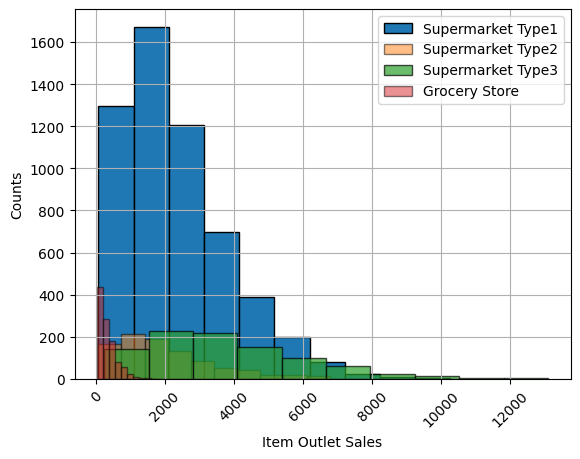

In [ ]:
price_filter1 = df.loc[:, 'Outlet_Type'] == 'Supermarket Type1'
df.loc[price_filter1, 'Item_Outlet_Sales'].hist(bins = 10,edgecolor='black')
price_filter2 = df.loc[:, 'Outlet_Type'] == 'Supermarket Type2'
df.loc[price_filter2, 'Item_Outlet_Sales'].hist(bins = 10,alpha=.5,edgecolor='black')
price_filter3 = df.loc[:, 'Outlet_Type'] == 'Supermarket Type3'
df.loc[price_filter3, 'Item_Outlet_Sales'].hist(bins = 10,alpha=.7,edgecolor='black')
price_filter4= df.loc[:, 'Outlet_Type'] == 'Grocery Store'
df.loc[price_filter4, 'Item_Outlet_Sales'].hist(bins = 10,alpha=.5,edgecolor='black')
plt.xticks(rotation = 45)
plt.legend(('Supermarket Type1', 'Supermarket Type2','Supermarket Type3','Grocery Store'), loc='upper right');
plt.ylabel('Counts');
plt.xlabel('Item Outlet Sales');

Supermarket type 1 represent the main type of the outlets followed by the grocery stores.

Graph 3.B

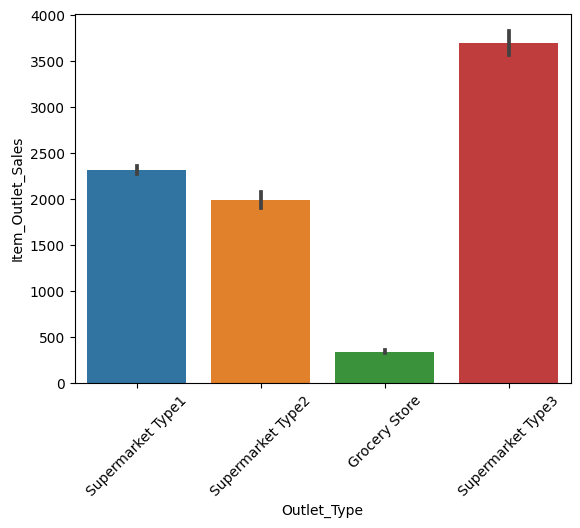

In [ ]:
sns.barplot(data=df, x='Outlet_Type', y="Item_Outlet_Sales");
plt.xticks(rotation = 45);

Supermarket Type3 shows the highest sales average (3700). Supermarket Type 1 come in the second position (2400 sales' average) even though they are the main type among all outlets.


4.Analyse the relation between Item Outlet Sales and Outlet location type:

Graph 4.A

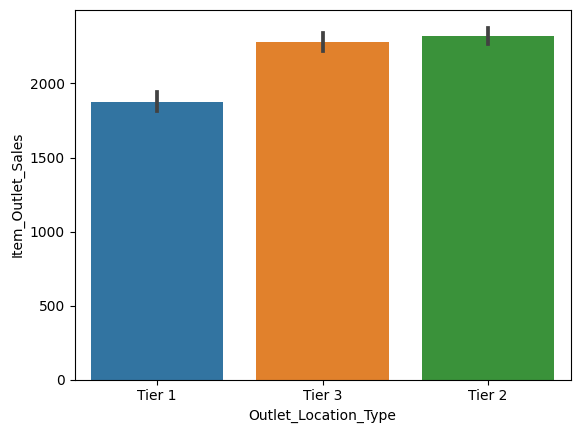

In [ ]:
sns.barplot(data=df, x='Outlet_Location_Type', y="Item_Outlet_Sales");

Outlets in location Tier 2 and Tier 3 show the highest sales average.

Graph 4.B

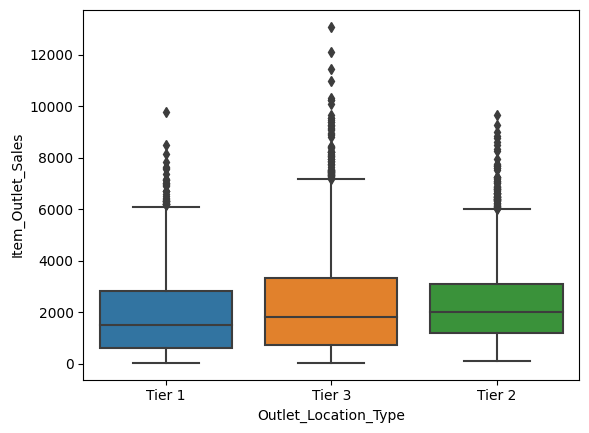

In [ ]:
sns.boxplot(data=df1, x='Outlet_Location_Type', y="Item_Outlet_Sales");

Outlets in location Tier 3 represent sales almost equal to Outlets in location Tier 2.However, Outlets in location Tier 3 have a wider spread than the one located in Tier 2 and Tier 1, which means more sales variability. Also, outlets located in Tier 1 and 3 are positively skewed, more concentrated at the lower end. which means that the lower sales are more concentrated within a narrower range of values than the higher sales. Outlets located in Tier 2 shows an almost symetric box: higher sales are almost equal to lower sales.

5.Analyse the relation between Item Outlet Sales and Outlet Size:

Graph 5.A

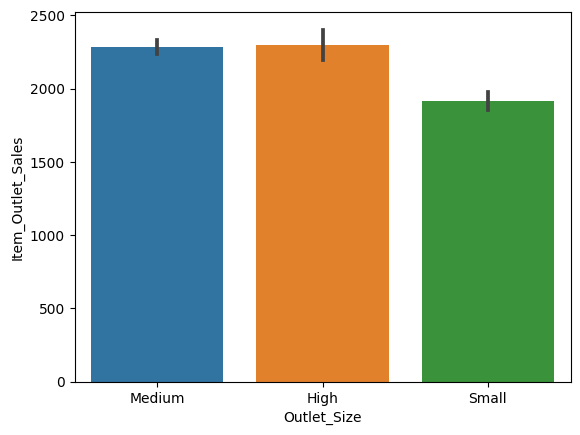

In [ ]:
sns.barplot(data=df, x='Outlet_Size', y="Item_Outlet_Sales");

Most sales are done in medium and high sizes outlets.

6.Analyse the relation between Item Outlet Sales and Item MRP:

Graph 6.A

In [ ]:
corr = df1.corr()

<ipython-input-83-647377e9e0db>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df1.corr()


(<Axes: >,)

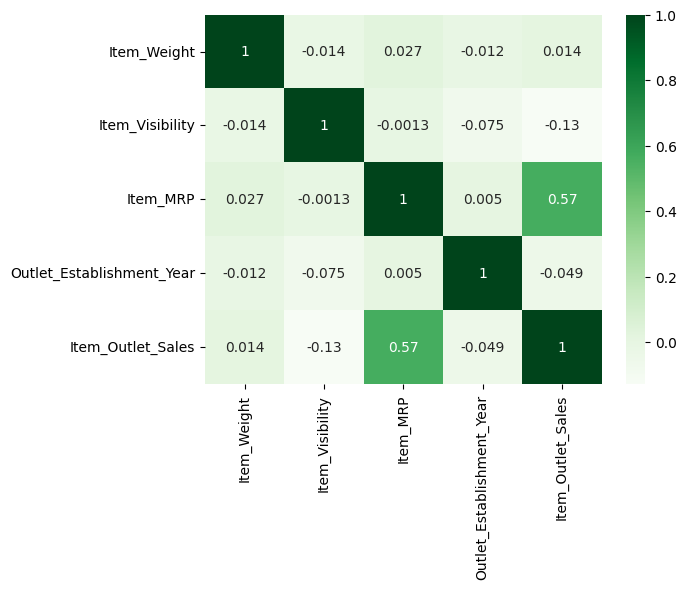

In [ ]:
sns.heatmap(corr, cmap = 'Greens', annot = True),

There is a moderate correlation between Item Outlet sales and Item MRP.

Graph 6.B

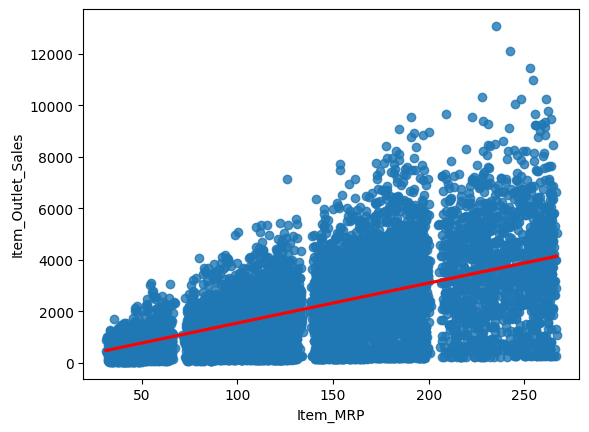

In [ ]:
sns.regplot(data=df, x='Item_MRP', y='Item_Outlet_Sales',line_kws = dict(color='red', ls='solid'));

The scatterplot correlating Item outlet sales with item MRP shows 4 groups.
Items with MRP between 20 and 70 (group 1) show the lowest sales average, followed by Items with MRP between 80 and 140 (group 2), then Items with MRP between 140 and 200 (group 3) and finally Items with sales between 210 and 270 (group 4) that represent the highest items'sales .

The sales increase whith the increase of the Item MRP.